                                      EDA-анализ базы данных токсинов и их мишеней
                                                    ВВЕДЕНИЕ
**Целью** работы с базой данных является выявления закономерностей между токсикологическими свойствами веществ и характеристиками их молекул.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
import numpy as np
import re
import plotly.express as px

In [15]:
df = pd.read_parquet("C:/Users/DNS/Desktop/my_project/converted_data_fixed.parquet")

In [46]:
# Посмотреть первые 10 значений после очистки
df["carcinogenicity"].head(100)


0         carcinogenic
1         carcinogenic
2     non-carcinogenic
3         carcinogenic
4         carcinogenic
            ...       
95    non-carcinogenic
96    non-carcinogenic
97        carcinogenic
98        carcinogenic
99        carcinogenic
Name: carcinogenicity, Length: 100, dtype: string

                                                   ОСНОВНОЙ АНАЛИЗ

**Этап 1: Оценка структуры данных**

In [48]:
print("Размер датасета:", df.shape)
print("Типы данных:", df.types)
df.head(10)
df.tail(10)

Размер датасета: (3915, 58)
Типы данных: 0       [{'id': 1, 'type_name': 'Inorganic Compound', ...
1       [{'id': 1, 'type_name': 'Inorganic Compound', ...
2       [{'id': 1, 'type_name': 'Inorganic Compound', ...
3       [{'id': 7, 'type_name': 'Organic Compound', 'c...
4       [{'id': 7, 'type_name': 'Organic Compound', 'c...
                              ...                        
3910    [{'id': 1, 'type_name': 'Inorganic Compound', ...
3911                                                   []
3912                                                   []
3913                                                   []
3914                                                   []
Name: types, Length: 3915, dtype: string


,Unnamed: 0,id,title,common_name,description,cas,pubchem_id,chemical_formula,weight,appearance,...,chembl_id,chemspider_id,biodb_id,synthesis_reference,structure_image_caption,synonyms_list,types,cellular_locations,tissues,pathways
3905,3668,5054.0,T3D4995,"22,23-dihydroavermectin b1a","22,23-dihydroavermectin b1a is a component of ...",71827-03-7,6440492.0,C48H74O14,NaN,White powder,...,CHEMBL1200633,24605910,<NA>,"<p>Shuet-Hing L. Chiu, Josephine R. Carlin, Ra...",<NA>,"22,23-Dihydroavermectin b1a\r\n5-O-Demethyl-22...","[{'id': 82, 'type_name': 'Drug', 'created_at':...","[{'id': 149, 'name': 'Apical Membrane', 'creat...",[],[]
3906,3669,5055.0,T3D4996,"22,23-dihydroavermectin b1b","22,23-dihydroavermectin b1b is a component of ...",70209-81-3,6436163.0,C47H72O14,NaN,White powder,...,CHEMBL1200633,24605910,<NA>,"<p>Shuet-Hing L. Chiu, Josephine R. Carlin, Ra...",<NA>,"22,23-Dihydroavermectin b1b\r\nAscapil\r\nAver...","[{'id': 82, 'type_name': 'Drug', 'created_at':...","[{'id': 149, 'name': 'Apical Membrane', 'creat...",[],[]
3907,3670,5056.0,T3D4997,Carbon-14,"Carbon-14, 14C, or radiocarbon, is a radioacti...",14762-75-5,26873.0,CH4,NaN,<NA>,...,<NA>,25031,<NA>,<NA>,<NA>,<NA>,"[{'id': 7, 'type_name': 'Organic Compound', 'c...","[{'id': 48, 'name': 'Cell surface', 'created_a...",[],"[{'id': 1121, 'name': 'Carbon Metabolism', 'sm..."
3908,3671,5057.0,T3D4998,Sulfur-35,Sulfur-35 is a radioactive isotope of sulfur.,15117-53-0,61783.0,H2S,NaN,<NA>,...,<NA>,55670,<NA>,<NA>,<NA>,<NA>,"[{'id': 1, 'type_name': 'Inorganic Compound', ...","[{'id': 27, 'name': 'Cell junction', 'created_...",[],"[{'id': 855, 'name': 'Sulfur metabolism', 'smp..."
3909,3672,5058.0,T3D4999,Succinyl acetoacetate,Succinylacetoacetate is an intermediate that a...,65115-74-4,NaN,C8H10O6,NaN,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"[{'id': 334, 'type_name': 'Metabolite', 'creat...","[{'id': 35, 'name': 'Cytoskeleton', 'created_a...",[],"[{'id': 770, 'name': 'Insulin secretion', 'smp..."
3910,3673,5059.0,T3D5000,Sulfuric acid,Sulfuric acid is a highly corrosive strong min...,7664-93-9,1118.0,H2O4S,NaN,"Clear, colorless, odorless liquid. Sometimes, ...",...,CHEMBL572964,1086,<NA>,<NA>,<NA>,Sulfurate\r\nSulphurate\r\nSulphuric acid\r\n[...,"[{'id': 1, 'type_name': 'Inorganic Compound', ...","[{'id': 48, 'name': 'Cell surface', 'created_a...",[],"[{'id': 1106, 'name': 'Phenothiazines', 'smpdb..."
3911,3674,5060.0,T3D5001,Succinic acid semialdehyde,Succinic acid semialdehyde (or succinate semia...,692-29-5,NaN,C4H6O3,NaN,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],[],[],[]
3912,3675,5061.0,T3D5002,L-Dopachrome,Dopachrome is a cyclization product of L-DOPA ...,89762-39-0,NaN,C9H7NO4,NaN,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],[],[],[]
3913,3676,5062.0,T3D5003,Benzoquinoneacetic acid,Benzoquinoneacetic acid (BQA) is an oxidized f...,10275-07-7,NaN,C8H6O4,NaN,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],[],[],[]
3914,3677,5063.0,T3D5004,Quinolacetic acid,Quinolacetic acid is a by-product of the parti...,55604-87-0,NaN,C8H8O4,NaN,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,[],[],[],[]


**Этап 2: Оценка полноты и целостности данных**

In [28]:
print("Количество отсутствующих значений:", df.isnull().sum())
missing = df.isnull().sum().sort_values(ascending = False) # Переменная, в которой записано количество пропусков в каждом столбце
missing_percent = (missing / len(df) * 100).round(1)
print("Определение процента пропусков в каждом столбце:\n", missing_percent)
print("\nОбщее количество пропусков:", missing.sum())
duplicates = df.duplicated().sum()
print("Количество дублирующихся строк:", duplicates)

Количество отсутствующих значений: Unnamed: 0                    3
id                          236
title                       186
common_name                  74
description                  97
cas                         261
pubchem_id                  462
chemical_formula            288
weight                     1412
appearance                  287
melting_point              2002
boiling_point              3482
solubility                 2369
route_of_exposure           861
mechanism_of_toxicity       688
metabolism                  915
toxicity                   2794
lethaldose                 3893
carcinogenicity             282
use_source                  922
min_risk_level             3913
health_effects             1067
symptoms                   1040
treatment                  1544
created_at                  411
updated_at                  411
wikipedia                  2739
uniprot_id                 3622
kegg_compound_id           2472
omim_id                    3691
chebi

**Выводы:**
1. У значительной части столбцов есть пропуски, особенно в structure_image_caption, что не является значимым для анализа, и столбцах, содержащих идентификаторы веществ из внешних баз.
2. Базовые поля необходимые для анализа содержат меньше пропусков и пригодны для анализа.
3. Дублирующиеся строки в датасете отсутствуют.

**Этап 3: Оценка выбросов и аномалий**

state
Solid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2890
Liquid                                                                                                             

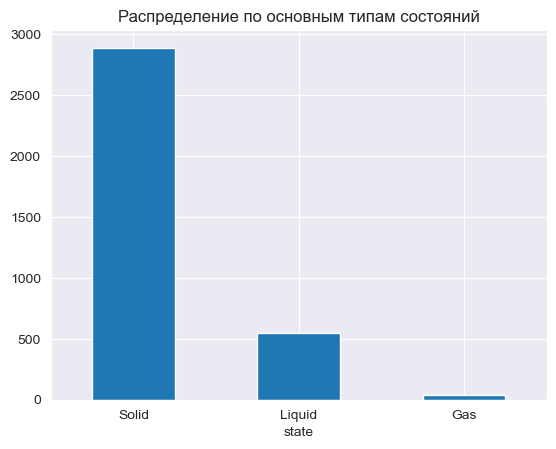

origin
Exogenous                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

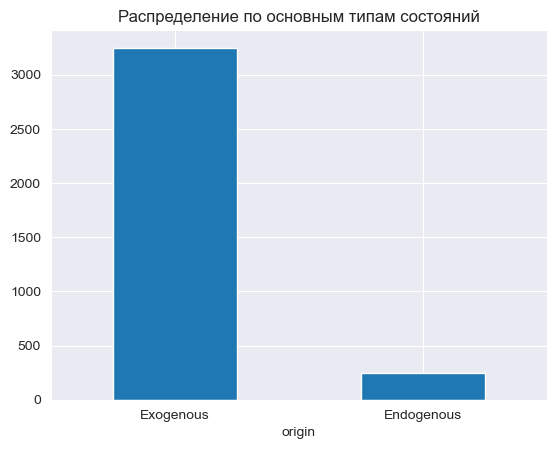

In [50]:
cat_cols = ['state', 'origin']

for col in cat_cols:
    display(df[col].value_counts())

    if col == 'state':
        allowed = ['Solid', 'Liquid', 'Gas']
    elif col == 'origin':
        allowed = ['Exogenous', 'Endogenous']
    else:
        allowed = df[col].unique()

    filtered = df[df[col].isin(allowed)]

    filtered[col].value_counts().plot(
        kind='bar',
        title=f"Распределение по основным типам состояний"
    )
    plt.xticks(rotation=0)
    plt.show()

**Выводы:**
1. Большинство токсинов, представленных в датасете, имеют экзогенное происхождение.
2. Токсичные соединения, входящие в исследуемый датасет, в основном представлены веществами в твёрдом агрегатном состоянии, также чуть более пятисот токсинов являются жидкими и наименее многочисленная группа токсинов представлена газообразными веществами.

In [51]:
numeric_cols = ['moldb_average_mass', 'moldb_mono_mass', 'logp', 'weight']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nСтатистика по числовым признакам:")
display(df[numeric_cols].describe())


Статистика по числовым признакам:


,moldb_average_mass,moldb_mono_mass,logp,weight
count,3376.000000,3372.000000,603.000000,2503.000000
mean,299.824120,299.333362,1.943242,2352.175684
std,197.229983,196.588186,2.523864,16301.351077
min,-0.640000,6.032099,-13.200000,0.000000
25%,178.260325,179.069685,0.390000,189.849295
50%,271.527000,270.635367,2.120000,284.600000
75%,361.980625,361.843825,3.560000,381.150900
max,3425.856000,3423.581083,10.000000,352274.085000


Также приведена статистика по числовым признакам, содержащимся в датасете. Они являются достаточными для дальнейшего анализа и визуализации.

                                      Проверка выбросов с помощью IQR


 moldb_average_mass: 168 выбросов (из 3915)

 moldb_mono_mass: 162 выбросов (из 3915)

 logp: 8 выбросов (из 3915)


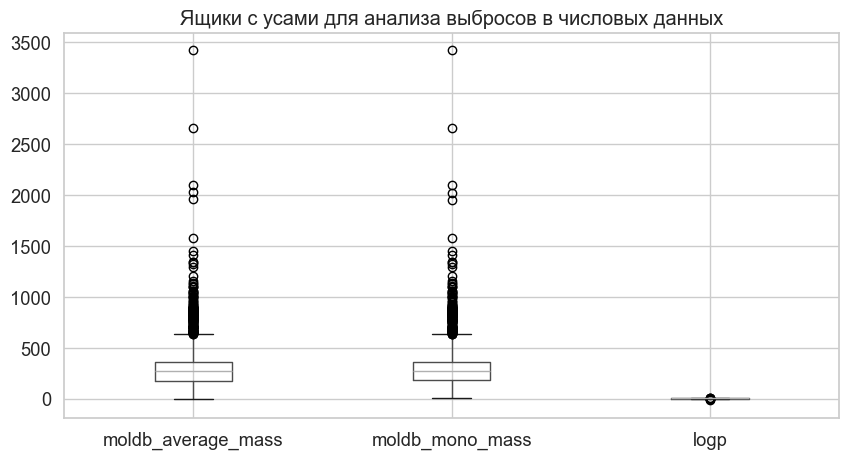

In [31]:
for col in numeric_cols:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        print(f"\n {col}: {len(outliers)} выбросов (из {len(df)})")

df.boxplot(column=numeric_cols, figsize=(10,5))
plt.title("Ящики с усами для анализа выбросов в числовых данных")
plt.show()

**Выводы:**
Молекулярные массы токсинов сконцентрированы в узком диапазоне, что говорит об общей однородности датафрейма по этому признаку. Немногочисленным выбросам, вероятно, соответствуют токсины с атипичной структурой.

**Этап 4: Метрики качества данных**

*В данном отчёте используются две основные метрики качества данных: полнота данных и уникальность записей.*

In [32]:
total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
completeness = round(1 - (total_missing / total_cells), 3)

print("Completeness (полнота данных):", completeness, "(в норме ≥ 0.98)")
if completeness >= 0.98:
    print("Полнота данных является нормальной.")
else:
    print("Имеется значительное количество пропусков данных.")


duplicate_count = df.duplicated().sum()
uniqueness = round(1 - (duplicate_count / len(df)), 3)

print(" Uniqueness (уникальность данных):", uniqueness)
if uniqueness == 1.0:
    print("Все записи уникальны.")
else:
    print("Обнаружено {duplicate_count} дубликатов из {len(df)} строк.")


Completeness (полнота данных): 0.593 (в норме ≥ 0.98)
Имеется значительное количество пропусков данных.
 Uniqueness (уникальность данных): 1.0
Все записи уникальны.


**Этап 5: Визуализация с помощью библиотеки Seaborn**

**1.** Построим комбинированный график распределения молекулярных масс соединений.

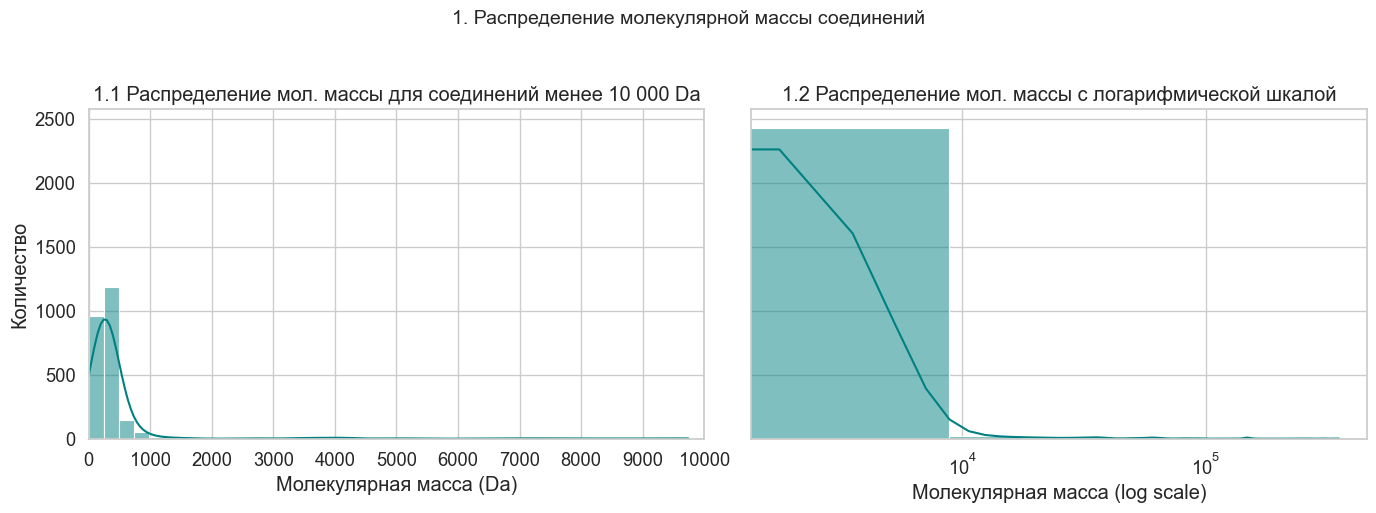

In [49]:
w = df["weight"].dropna()
w_main = w[w <= 10_000]
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(w_main, bins=40, kde=True, color="teal", ax=axes[0])
axes[0].set_title("1.1 Распределение мол. массы для соединений менее 10 000 Da")
axes[0].set_xlabel("Молекулярная масса (Da)")
axes[0].set_ylabel("Количество")
axes[0].set_xlim(0, 10_000)
axes[0].set_xticks(np.arange(0, 10_001, 1_000))

sns.histplot(w, bins=40, kde=True, color="teal", ax=axes[1])
axes[1].set_title("1.2 Распределение мол. массы с логарифмической шкалой")
axes[1].set_xlabel("Молекулярная масса (log scale)")
axes[1].set_ylabel("Количество")
axes[1].set_xscale("log")

fig.suptitle("1. Распределение молекулярной массы соединений", y=1.03, fontsize=14)

plt.tight_layout()
plt.show()

**Вывод:** График 1.1 демонстрирует, что подавляющее большинство соединений имеет молекулярную массу менее 1000 Da, следовательно, относятся к низкомолекулярным органическим веществам. Соединения с массой более 2 000 Da встречаются редко. График 1.2 позволяет увидеть всю совокупность значений и подтверждает наличие небольшого количество крупных молекул с массой до 10⁵ Da.

Таким образом, распределение молекулярной массы соответствует положительно перекошенному распределению (right-skewed distribution). Данные характеризуются большим числом лёгких соединений - простых органических токсинов, и редкими, но значительно более тяжёлыми биомолекулами, также обладающими токсическими свойствами.

**2.** Построим тепловые карты для отражения корреляции между молекулярной массой соединений и их температурами плавления и кипения.

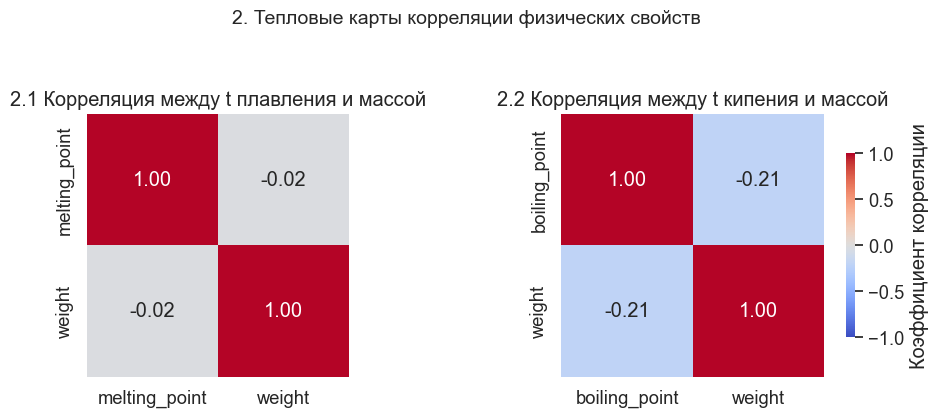

In [45]:
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)
subset_melt = df[["melting_point", "weight"]].dropna()
subset_boil = df[["boiling_point", "weight"]].dropna()
corr_melt = subset_melt.corr()
corr_boil = subset_boil.corr()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(
    corr_melt, annot=True, fmt=".2f", cmap="coolwarm",
    vmin=-1, vmax=1, square=True, ax=axes[0], cbar=False
)
axes[0].set_title("2.1 Корреляция между t плавления и массой")

sns.heatmap(
    corr_boil, annot=True, fmt=".2f", cmap="coolwarm",
    vmin=-1, vmax=1, square=True, ax=axes[1],
    cbar_kws={"shrink": 0.7, "label": "Коэффициент корреляции"}
)
axes[1].set_title("2.2 Корреляция между t кипения и массой")

plt.suptitle("2. Тепловые карты корреляции физических свойств", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

**Выводы:**
1. На тепловой карте 2.1 отражена взаимосвязь между температурой плавления и массой. Полученное значение коэффициента корреляции r = –0.02 указывает на отсутствие статистически значимой зависимости между этими параметрами. Это означает, что в данном наборе данных увеличение или уменьшение массы соединения не сопровождается закономерным изменением температуры плавления. Вероятнее всего, это связано с тем, что датасет включает химические вещества разных классов и структур (органические, неорганические, металлы, соли), у которых физико-химические свойства формируются под действием разных параметров — типа связи, кристаллической решётки, степени полярности.
Таким образом, можно сделать вывод, что масса вещества не является надёжным предиктором температуры плавления в рамках данной выборки.

2. На тепловой карте 2.2 показана взаимосвязь между температурой кипения и массой. Коэффициент корреляции r = –0.21 указывает на слабую отрицательную зависимость между этими параметрами. Следовательно, с ростом молекулярной массы температура кипения имеет тенденцию к небольшому снижению, однако связь выражена незначительно. Такой результат вероятно также свзязан с разнородностью соединений в наборе данных: представленные вещества относятся к разным классам и обладают разными механизмами межмолекулярных взаимодействий, влияющих на температуру фазового перехода.
Таким образом, в рамках данного датасета молекулярная масса оказывает лишь слабое и непостоянное влияние на температуру кипения.

**3.** Гистограмма распределения для показателей липофильности соединений.

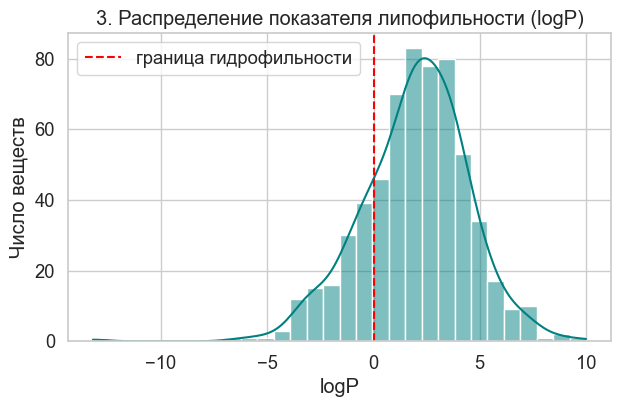

In [50]:
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

plt.figure(figsize=(7, 4))
sns.histplot(df["logp"].dropna(), bins=30, kde=True, color="teal")
plt.title("3. Распределение показателя липофильности (logP)")
plt.xlabel("logP")
plt.ylabel("Число веществ")
plt.axvline(0, color="red", linestyle="--", label="граница гидрофильности")
plt.legend()
plt.show()

**Вывод:** Распределение значений logP показывает, что большинство соединений в датасете имеют значение больше нуля, что соответствует умеренной и высокой липофильности. Липофильные вещества способны с лёгкостью проникать через клеточные мембраны и накапливаться в организме, что и характерно для большинства токсинов из датасета. Меньшая часть соединений проявляет гифдрофильность и растворима в воде, а, значит, быстрее выводится из организма и не имеет накопительного эффекта.

**4.** Построим диаграмму рассеивания для определения связи между молекулярной массой и липофильностью.

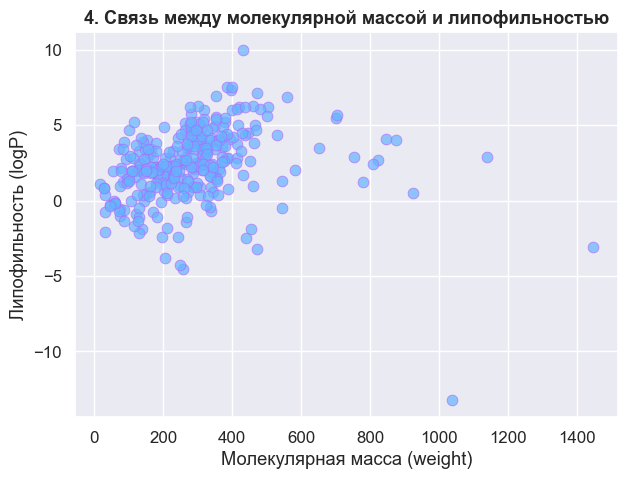

In [54]:
sns.set_theme(style="darkgrid", palette="mako", font_scale=1.1)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="weight",
    y="logp",
    color="#66b3ff",
    alpha=0.7,
    s=60,
    edgecolor="#b366ff"
)

plt.title("4. Связь между молекулярной массой и липофильностью", fontsize=13, weight="bold")
plt.xlabel("Молекулярная масса (weight)")
plt.ylabel("Липофильность (logP)")
plt.show()

**5.** Построим круговую диаграмму с динамической визуализацией с помощью Plotly Express.

In [55]:
counts = df["carcinogenicity"].value_counts().reset_index()
counts.columns = ["carcinogenicity", "count"]

fig = px.pie(
    counts,
    names="carcinogenicity",
    values="count",
    title="5. Доля веществ по признаку канцерогенности",
    color="carcinogenicity",
    color_discrete_map={
        "carcinogenic": "#ff66b3",
        "uncertain": "#66b3ff",
        "non-carcinogenic": "#b366ff"
    },
    hole=0.3
)
fig.update_traces(textinfo="percent+label")
fig.show()


**Вывод**: благодаря динамической визуализации можно наглядно увидеть распределение веществ по категории "канцерогенность" и точное количество соединений в каждой категории. Круговая диаграмма показывает, что большая часть (68,5 %) соединений в исследуемом датасете являются неканцерогенными, а 25,9 % веществ - оказывают канцерогенный эффект. Для 5,53 % соединений, что составляет малую часть, эффект не определён. Таким образом, можно подытожить, что большинство токсинов, представленных в датасете, обладают токсическим эффектом, и в меньшей степени влияют на вероятность образования злокачественных опухолей.

**6.** Построим столбчатую диаграмму, отражающую наиболее частые пути попадания исследуемых токсинов в организм человека.

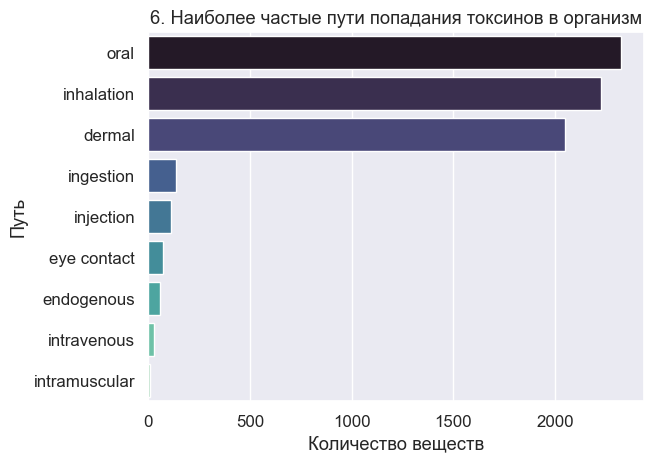

In [56]:
# Чистка столбца route_of_exposure от лишних символов
routes_exploded = (
    df["route_of_exposure"]
    .dropna()
    .str.lower()
    .str.replace("and ", "", regex=False)
    .str.replace("or ", "", regex=False)
    .str.split(",")
    .explode()
    .str.strip()
)

routes_exploded = routes_exploded[
    routes_exploded.notna() &
    (routes_exploded.str.len() > 1) &
    (~routes_exploded.isin(["and", "or", "parenteral" , "topical", "however"]))
]

route_counts = routes_exploded.value_counts().reset_index()
route_counts.columns = ["route", "count"]

sns.barplot(
    data=route_counts.head(9),
    x="count",
    y="route",
    hue="route",
    palette="mako",
    legend=False
)

plt.title("6. Наиболее частые пути попадания токсинов в организм")
plt.xlabel("Количество веществ")
plt.ylabel("Путь")
plt.show()


**Вывод**: самый распространенный путь, через который исследуемые токсины попадают в организм - это оральный, то есть попадание при проглатывании, второй по распространенности - ингаляционный (при вдыхании) и третий - дермальный (попадание через кожные покровы). Наиболее редкими путями являются внутримышечное и внутривенное введение токсинов, что и логично, так как таким методом в основном вводятся лекарственные препараты, которые предварительно проходят очистку от токсинов. Соответственно, наиболее часто токсины попадают в организм случайным образом, при вдыхании, проглатывании или контакте с кожей и ранами, так как эти действия мы выполняем ежедневно и часто, и выполняя их неосторожно или в ненадлежащих местах может произойти попадание токсинов в организм.

                                                Заключение

1. В ходе проведённого EDA-анализа данных оценивалась структура, полнота и качество данных в датафрейме токсинов и их мишеней. Большая часть данных является уникальной, но полнота данных находится на низком уровне и требует доработки. Распределения числовых параметров в целом стабильные, с небольшим числом выбросов. Можно отметить, что датасет содержит много текстовой информации, что говорит о его полноте с точки зрения описания токсинов, но в то же время данный факт осложняет EDA-анализ, для которого более информативными являются числовые данные.

2. Визуализация с помощью Seaborn и Plotly Express позволила оценить уровни корреляции между массой соединений и температурами кипения и плавления, определить долю канцерогенных токсинов в датасете, оценить распределение липофильности и её связь с молекулярной массой соединений, а также распределение молекулярной массы веществ. Также удалось выявить наиболее распространенные пути попадания исследуемых токсинов в организм.